In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [165]:
train_data = pd.read_csv('data/train.csv')
testdata = pd.read_csv("data/test.csv")

In [166]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [167]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [168]:

# print only columns that has missing values
missing_values_data =  train_data.isnull().sum()[train_data.isnull().sum() > 0 ]
missing_values_data.sort_values(ascending=False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [169]:
train_data.drop_duplicates()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [170]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [171]:
# numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
# category_cols = train_data.select_dtypes(include=['object']).columns
# print(numerical_cols , numerical_cols.shape)
# print(category_cols , category_cols.shape )


In [172]:
print("description of numerical data")
#train_data[numerical_cols].describe()

description of numerical data


In [173]:
train_data.isnull().sum()[train_data.isnull().sum() > 0].sort_values(ascending=True)

Electrical         1
MasVnrArea         8
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [174]:
#drop the columns that has missing values more than 50% (1460 / 2) of the data + fireplaceQu
train_data = train_data.drop(columns=["Id","PoolQC" , "MiscFeature", 'Alley', 'Fence' , "MasVnrType" , 'FireplaceQu' ])
testdata = testdata.drop(columns=["Id","PoolQC" , "MiscFeature", 'Alley', 'Fence' , "MasVnrType" , 'FireplaceQu' ])



In [175]:
missing_values = train_data.isnull().sum()
missing_columns = missing_values[missing_values >0]
data_types = train_data.dtypes[missing_columns.index]
missing_info = pd.DataFrame({
  'missing values' : missing_columns,
  'types' : data_types
})
missing_info

,missing values,types
LotFrontage,259,float64
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object
GarageType,81,object
GarageYrBlt,81,float64


In [176]:
train_data["LotFrontage"] = train_data["LotFrontage"].fillna(train_data["LotFrontage"].mean())

In [177]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [178]:
train_data["LotFrontage"].isnull().sum()

np.int64(0)

In [179]:
train_data.isnull().sum()[train_data.isnull().sum() > 0].sort_values(ascending=True)

Electrical       1
MasVnrArea       8
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [180]:
columns_with_missing = train_data.columns[train_data.isnull().any()]
data_missing = train_data[columns_with_missing]
for column in data_missing.columns:
  if data_missing[column].dtype in ['float64' , 'int64']:
    data_missing.loc[:,column] = data_missing[column].fillna(data_missing[column].mean())
  else:
    data_missing.loc[:,column] = data_missing[column].fillna(data_missing[column].mode()[0])


data_missing.isnull().sum()[data_missing.isnull().sum() > 0].sort_values(ascending=True)

Series([], dtype: int64)

In [181]:
train_data[columns_with_missing] = data_missing
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [182]:
train_data.isnull().sum()[train_data.isnull().sum() >0]

Series([], dtype: int64)

In [183]:
train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [184]:
def encoding_features(data):
  data = data.copy()
  encoder = LabelEncoder()

  category_cols = data.select_dtypes(include=['object']).columns

 # Iterate over each column
  for column in data[category_cols].columns:
        # Check if the values are in ['low', 'medium', 'high'] range
        if set(data[column]).issubset(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']) or \
           set(data[column]).issubset(['Fin', 'RFn', 'Unf', 'NA'])  :
            data[column] = encoder.fit_transform(data[column])  # Apply LabelEncoder
        else:
            # Apply one-hot encoding using pd.get_dummies
          encoded_cols = pd.get_dummies(data[column], drop_first=True)
          data = pd.concat([data.drop(column, axis=1), encoded_cols], axis=1)
          
  return data





In [185]:
train_data = encoding_features(train_data)
testdata = encoding_features(testdata)

In [186]:
scaler = StandardScaler()
# testdata
train_data = pd.DataFrame(scaler.fit_transform(train_data) , columns=train_data.columns)
testdata = pd.DataFrame(scaler.fit_transform(testdata) , columns=testdata.columns)

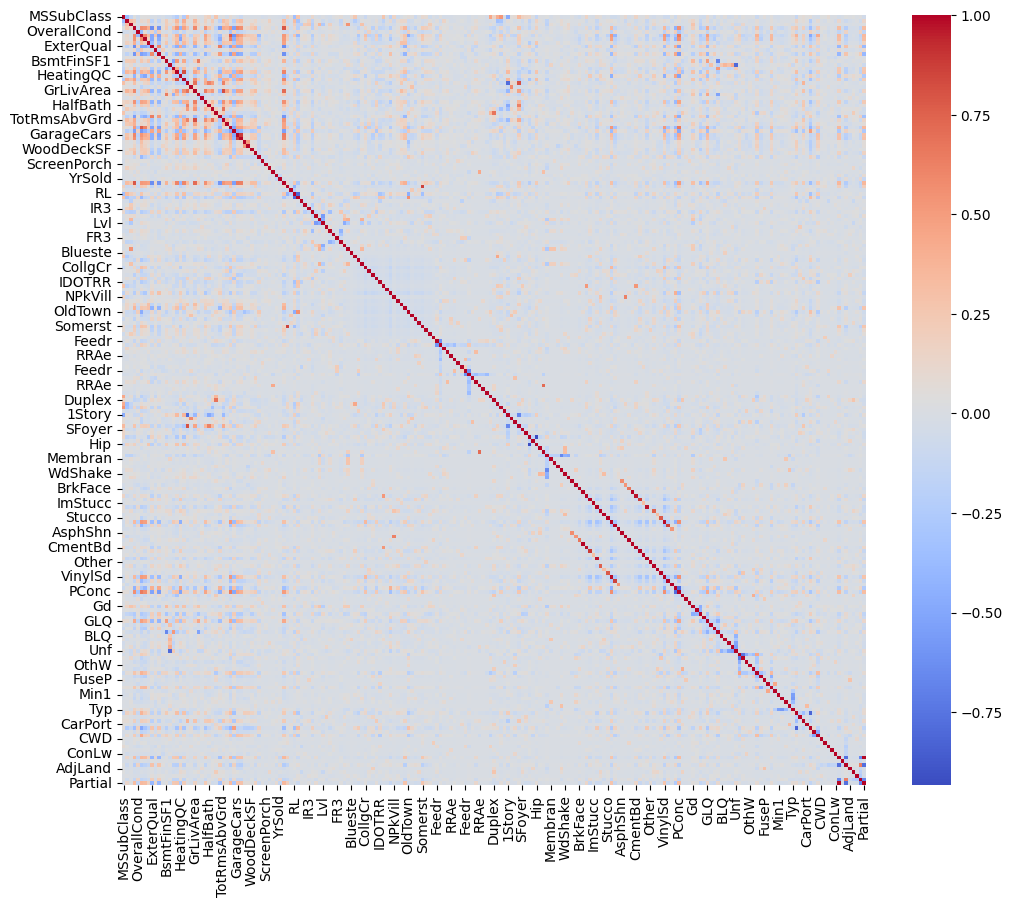

In [187]:
corr_matrix = train_data.corr()


plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix , annot=False , cmap='coolwarm')
plt.show()

In [188]:
train_data["SalePrice"]

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [189]:
X  = train_data.drop(columns='SalePrice')
X.isnull().sum()[X.isnull().sum() > 0]

Series([], dtype: int64)

In [190]:
y = train_data["SalePrice"]
y

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [191]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'X' is your feature set and 'y' is your target variable
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['LotArea', 'OverallQual', 'ExterQual', 'BsmtQual', 'GrLivArea',
       'FullBath', 'KitchenQual', 'GarageCars', 'MiscVal', 'NoRidge',
       'NridgHt', 'Veenker', 'PosN', 'RRAn', 'ImStucc', 'Other', 'Con', 'New',
       'Alloca', 'Partial'],
      dtype='object')


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


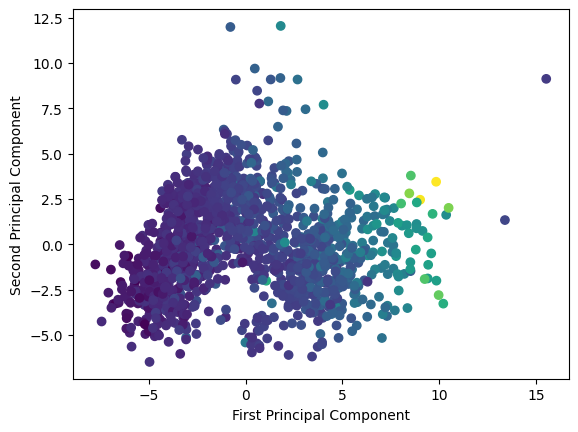

In [192]:
from sklearn.decomposition import PCA

# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = X # it is scaled

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [193]:
X


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-3.660830,-2.369689,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [210]:

  X


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-3.660830,-2.369689,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [211]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# X_new is X after selecting important features using selectKbest
#X.drop(columns=['Fa', 'Po', 'RFn', 'TA'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '

                                   RMSE            R2
Linear Regression          2.346585e+08 -4.527590e+16
Ridge Regression           6.106324e-01  6.934127e-01
Lasso Regression           1.103302e+00 -8.824919e-04
ElasticNet Regression      9.357882e-01  2.799717e-01
Decision Tree              5.324574e-01  7.668883e-01
Random Forest              3.706333e-01  8.870507e-01
Gradient Boosting          3.483698e-01  9.002127e-01
Support Vector Regression  5.733079e-01  7.297472e-01


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [196]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# Best parameters and model
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

print("Best parameters for Gradient Boosting:", best_params_gb)
print("Best model for Gradient Boosting:", best_model_gb)

KeyboardInterrupt: 

In [212]:
bestmodel = GradientBoostingRegressor(learning_rate=0.1 , max_depth= 3, min_samples_split=10,n_estimators=300)
#training
bestmodel.fit(X_train,y_train)

#predicting
predictions = bestmodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data:", mse)


Mean Squared Error on test data: 0.32868194002724416


In [226]:
# missing_in_test = set(train_data.columns) - set(testdata.columns)
testdata['TA']
duplicate_cols_testdata = testdata.columns[testdata.columns.duplicated()].tolist()
if duplicate_cols_testdata:
    print("Duplicate columns in testdata:", duplicate_cols_testdata)

# Remove duplicates if necessary (example: keep the first occurrence)
X_test = X_test.loc[:, ~X_test.columns.duplicated()]
testdata = testdata.loc[:, ~testdata.columns.duplicated()]
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
892,-0.872563,-0.002269,-0.210750,-0.071836,2.179628,-0.273836,0.878668,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1105,0.073375,1.269506,0.174303,1.374795,-0.517200,0.752907,0.491040,1.431049,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
413,-0.636078,-0.638156,-0.156028,-0.795151,0.381743,-1.466183,-1.689368,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
522,-0.163109,-0.910680,-0.552908,-0.071836,1.280685,-0.803768,-1.689368,-0.574410,0.663451,-2.369689,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1036,-0.872563,0.860721,0.238646,2.098110,-0.517200,1.183477,1.120936,-0.186614,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,-0.636078,-0.910680,-0.460202,-1.518467,1.280685,-1.134975,0.733308,1.835465,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,10.984838,-0.117851,-2.138345,-0.305995
1361,-0.872563,2.450439,0.565370,0.651479,-0.517200,1.117235,0.975575,-0.485771,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
802,0.073375,-0.320213,-0.232297,0.651479,-0.517200,1.117235,0.975575,-0.574410,-0.777976,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
651,0.309859,-0.456474,-0.143601,-1.518467,-0.517200,-1.035613,-1.689368,-0.574410,0.663451,0.364207,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [221]:
diff = set(testdata) - set(X_test)
diff

{'Fa', 'Po', 'RFn', 'TA'}

In [ ]:
test2 = pd.read_csv('data/test.csv')
test_predections = bestmodel.predict(testdata)
submissionfile = pd.DataFrame({'Id' :test2['Id'] , "SalePrice" : test_predections })
submissionfile.to_csv('submission.csv', index=False)
X

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Fa
- Po
- RFn
- TA
Feature names seen at fit time, yet now missing:
- 2.5Fin
- BsmtCond
- BsmtQual
- CompShg
- GarageCond
- ...


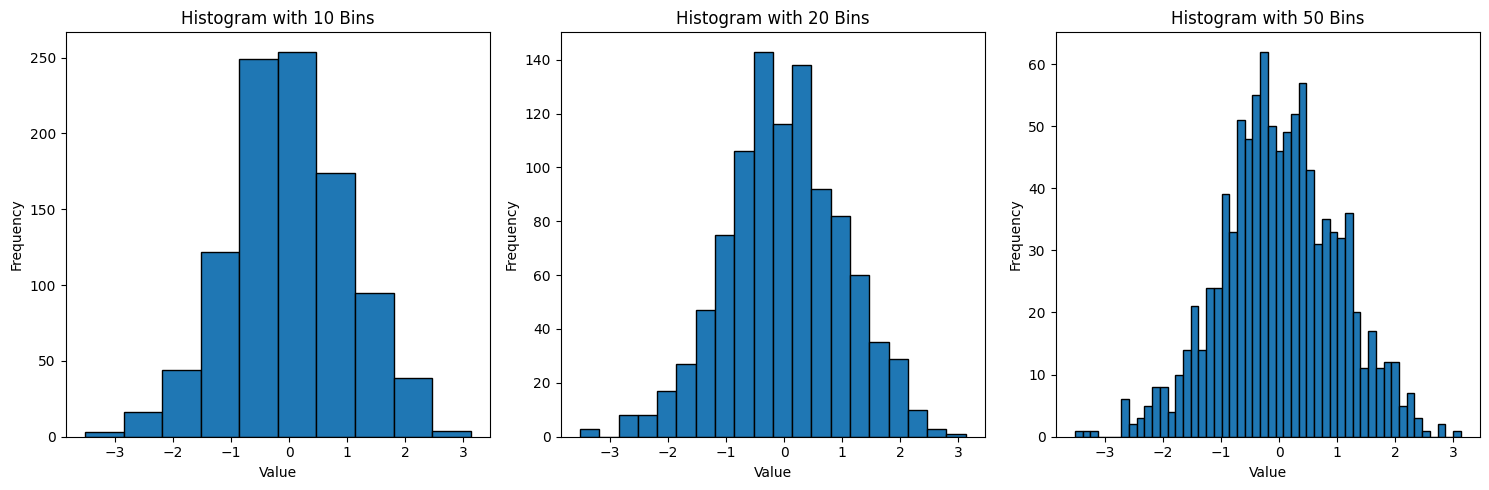

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data
data = np.random.randn(1000)

# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram with 10 bins
axs[0].hist(data, bins=10, edgecolor='black')
axs[0].set_title('Histogram with 10 Bins')

# Histogram with 20 bins
axs[1].hist(data, bins=20, edgecolor='black')
axs[1].set_title('Histogram with 20 Bins')

# Histogram with 50 bins
axs[2].hist(data, bins=50, edgecolor='black')
axs[2].set_title('Histogram with 50 Bins')

# Add labels
for ax in axs:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
